In [2]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

import env

from env import get_db_url

from sklearn.cluster import KMeans

import wrangle

import viz_kmeans



from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler



In [2]:
def new_iris_data():
    '''
    This function reads the iris data from the Codeup db into a df.
    '''
    sql_query = """
                SELECT 
                    species_id,
                    species_name,
                    sepal_length,
                    sepal_width,
                    petal_length,
                    petal_width
                FROM measurements
                JOIN species USING(species_id)
                """
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_db_url('iris_db'))
    
    return df

def get_iris_data():
    '''
    This function reads in iris data from Codeup database, writes data to
    a csv file if a local file does not exist, and returns a df.
    '''
    if os.path.isfile('iris_df.csv'):
        
        # If csv file exists read in data from csv file.
        df = pd.read_csv('iris_df.csv', index_col=0)
        
    else:
        
        # Read fresh data from db into a DataFrame
        df = new_iris_data()
        
        # Cache data
        df.to_csv('iris_df.csv')
        
    return df

1. Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

In [3]:
df = get_iris_data()
df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [4]:
df = df.rename(columns={'species_name': 'species'})
df

,species_id,species,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2
...,...,...,...,...,...,...
145,3,virginica,6.7,3.0,5.2,2.3
146,3,virginica,6.3,2.5,5.0,1.9
147,3,virginica,6.5,3.0,5.2,2.0
148,3,virginica,6.2,3.4,5.4,2.3


a. Choose features other than the ones used in the lesson.

In [5]:
X = df[['petal_length', 'petal_width']]
X.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [6]:
# MAKE the thing
kmeans = KMeans(n_clusters=3)

# FIT the thing
kmeans.fit(X)

# USE (predict using) the thing 
kmeans.predict(X)

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [7]:
# make a new column names cluster in iris and X dataframe

df['cluster'] = kmeans.predict(X)

X['cluster'] = kmeans.predict(X)

df.head(3)


/var/folders/_6/0nkpzhxj2_n85fz5s1rk__xr0000gn/T/ipykernel_16527/528798740.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = kmeans.predict(X)


,species_id,species,sepal_length,sepal_width,petal_length,petal_width,cluster
0,1,setosa,5.1,3.5,1.4,0.2,1
1,1,setosa,4.9,3.0,1.4,0.2,1
2,1,setosa,4.7,3.2,1.3,0.2,1


b. Visualize the results of your clustering.

In [8]:
df.groupby('species').mean()

,species_id,sepal_length,sepal_width,petal_length,petal_width,cluster
species,,,,,,
setosa,1.0,5.006,3.428,1.462,0.246,1.00
versicolor,2.0,5.936,2.770,4.260,1.326,1.92
virginica,3.0,6.588,2.974,5.552,2.026,0.16


/Users/derekbixby/codeup-data-science/clustering_exercises/viz_kmeans.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  centroids = np.array(iris.groupby('cluster')['petal_length', 'sepal_length'].mean())


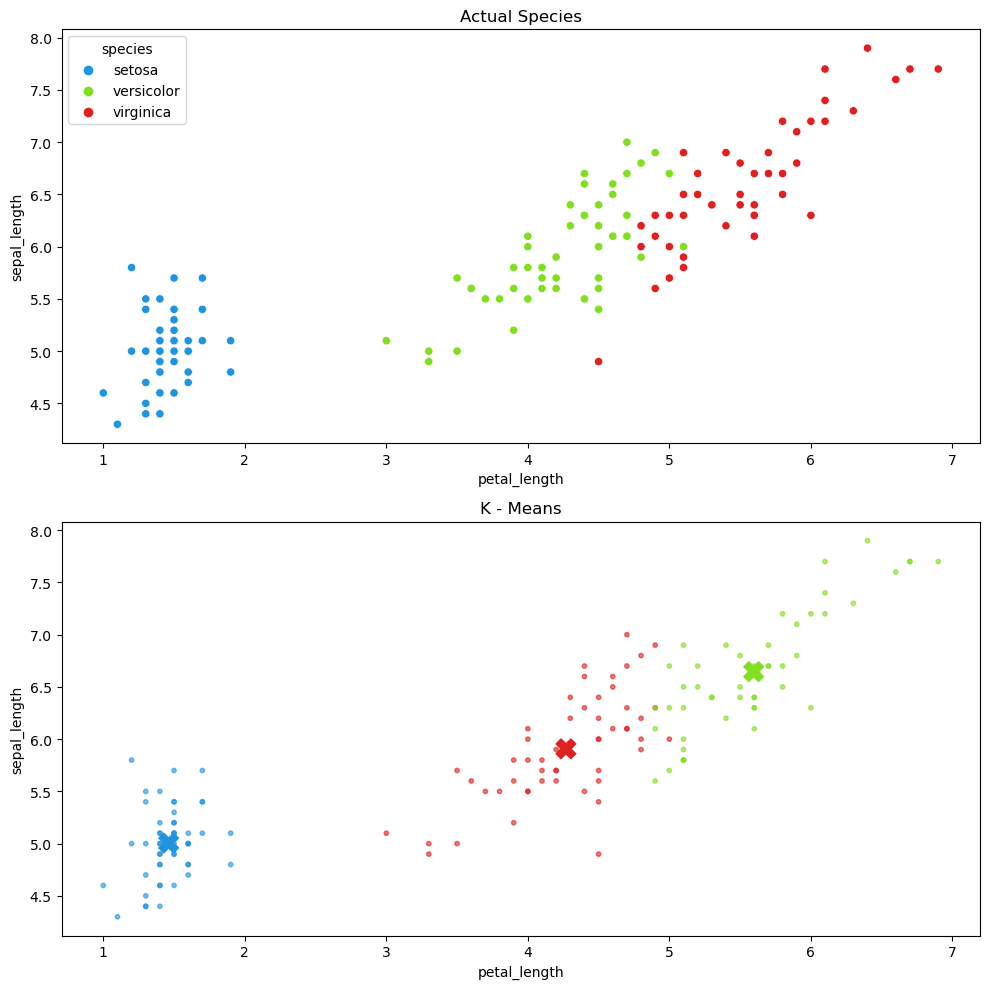

In [10]:


# Visualize the scatter plot for Actual vs predicted (K-Means)
viz_kmeans.viz_iris(df)



In [11]:
kmeans.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

In [12]:
# Make a dataframe 

centroids = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns[:2])
centroids

,petal_length,petal_width
0,5.595833,2.037500
1,1.462000,0.246000
2,4.269231,1.342308


In [13]:
df.groupby('cluster')['petal_length', 'petal_length'].mean()

/var/folders/_6/0nkpzhxj2_n85fz5s1rk__xr0000gn/T/ipykernel_16527/2476815806.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('cluster')['petal_length', 'petal_length'].mean()


,petal_length,petal_length
cluster,,
0,5.595833,5.595833
1,1.462000,1.462000
2,4.269231,4.269231


In [14]:
# Labels (same as from predict) for each observation

kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [15]:
df['cluster'] = 'cluster_' + df.cluster.astype(str)
df.head()


,species_id,species,sepal_length,sepal_width,petal_length,petal_width,cluster
0,1,setosa,5.1,3.5,1.4,0.2,cluster_1
1,1,setosa,4.9,3.0,1.4,0.2,cluster_1
2,1,setosa,4.7,3.2,1.3,0.2,cluster_1
3,1,setosa,4.6,3.1,1.5,0.2,cluster_1
4,1,setosa,5.0,3.6,1.4,0.2,cluster_1


<Figure size 1400x900 with 0 Axes>

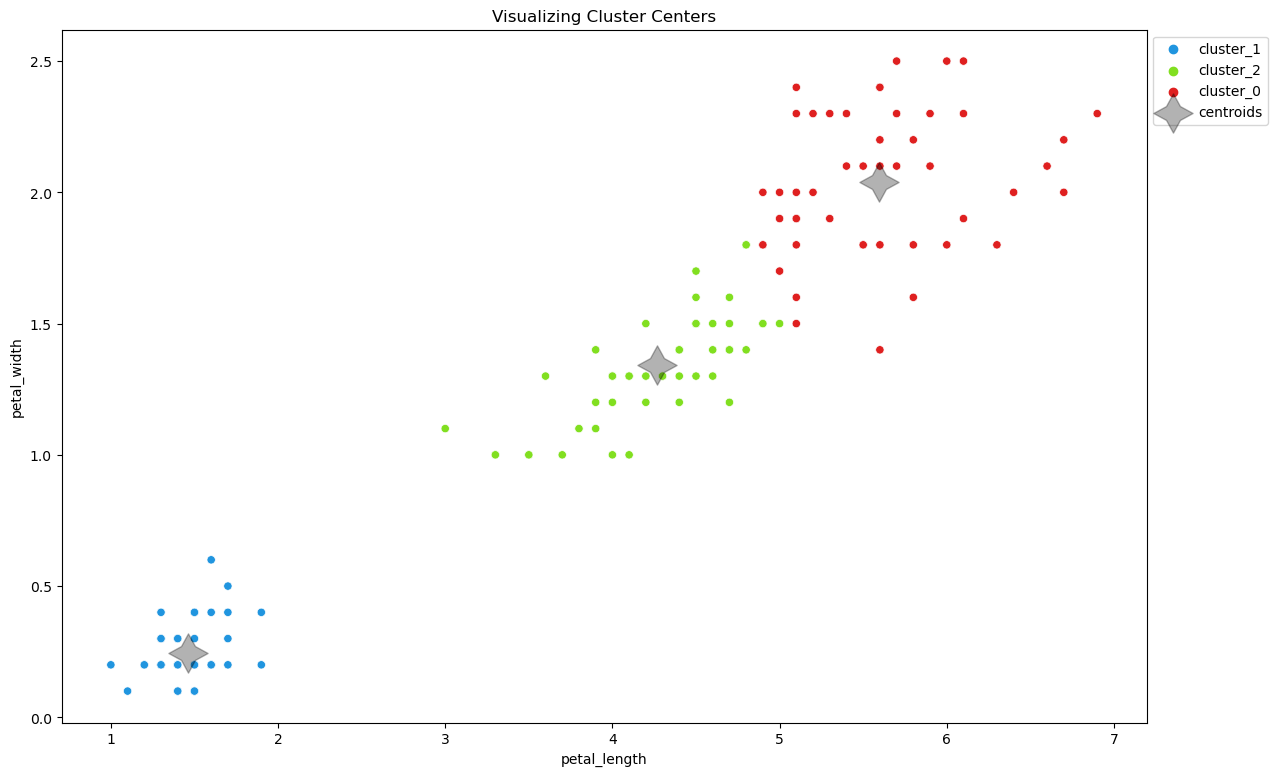

In [17]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))
plt.figure(figsize=(14, 9))


# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_length', y = 'petal_width', data = df, hue = 'cluster')


# plot cluster centers (centroids)
centroids.plot.scatter(x = 'petal_length', y = 'petal_width', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = (4,1,0), label = 'centroids')

plt.title('Visualizing Cluster Centers')

# Get unique cluster labels
unique_clusters = df['cluster'].unique()

# Create legend labels for clusters
cluster_labels = [f'Cluster {cluster}' for cluster in unique_clusters]

plt.legend(bbox_to_anchor=(1, 1), loc='upper left');

c. Use the elbow method to visually select a good value for k.

In [18]:


kmeans.inertia_



31.371358974358973

In [19]:
k = 2

kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
kmeans.inertia_

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


186.2797029114676

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/an

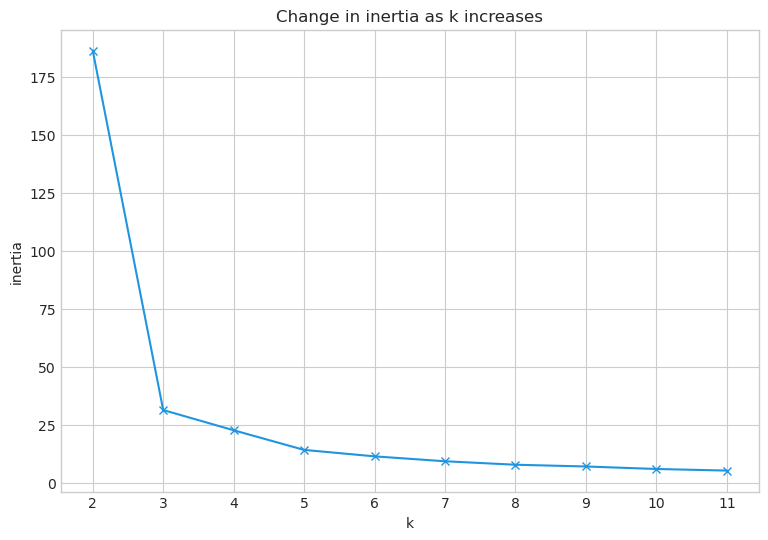

In [20]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

    

d. Repeat the clustering, this time with 3 different features.

In [21]:
X = df[['petal_length', 'sepal_length', 'petal_width']]
X.head()


,petal_length,sepal_length,petal_width
0,1.4,5.1,0.2
1,1.4,4.9,0.2
2,1.3,4.7,0.2
3,1.5,4.6,0.2
4,1.4,5.0,0.2


In [22]:
# MAKE the thing
kmeans = KMeans(n_clusters=3)

# FIT the thing
kmeans.fit(X)

# USE (predict using) the thing 
kmeans.predict(X)


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [23]:
# make a new column names cluster in iris and X dataframe

df['cluster'] = kmeans.predict(X)

X['cluster'] = kmeans.predict(X)

df.head(3)

/var/folders/_6/0nkpzhxj2_n85fz5s1rk__xr0000gn/T/ipykernel_16527/1873855551.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = kmeans.predict(X)


,species_id,species,sepal_length,sepal_width,petal_length,petal_width,cluster
0,1,setosa,5.1,3.5,1.4,0.2,0
1,1,setosa,4.9,3.0,1.4,0.2,0
2,1,setosa,4.7,3.2,1.3,0.2,0


In [24]:


df.groupby('species').mean()



,species_id,sepal_length,sepal_width,petal_length,petal_width,cluster
species,,,,,,
setosa,1.0,5.006,3.428,1.462,0.246,0.00
versicolor,2.0,5.936,2.770,4.260,1.326,1.96
virginica,3.0,6.588,2.974,5.552,2.026,1.28


/Users/derekbixby/codeup-data-science/clustering_exercises/viz_kmeans.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  centroids = np.array(iris.groupby('cluster')['petal_length', 'sepal_length'].mean())


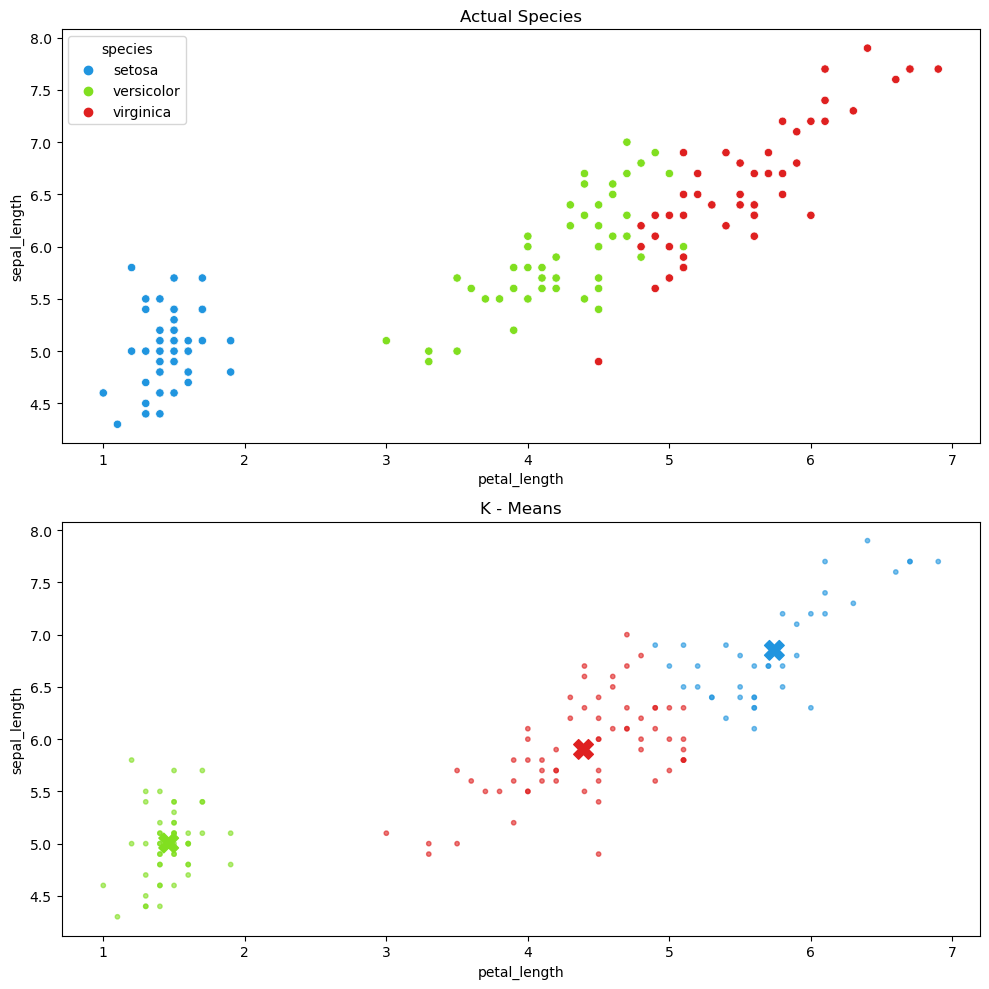

In [25]:


# Visualize the scatter plot for Actual vs predicted (K-Means)
viz_kmeans.viz_iris(df)



In [26]:
# Cluster Centers aka centroids. -- The output is also not scaled; 
    # it would be scaled if the data used to fit was scaled.

kmeans.cluster_centers_


array([[1.462     , 5.006     , 0.246     ],
       [5.74210526, 6.85      , 2.07105263],
       [4.39354839, 5.9016129 , 1.43387097]])

In [28]:
# Make a dataframe 

centroids = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns[:3])
centroids


,petal_length,sepal_length,petal_width
0,1.462000,5.006000,0.246000
1,5.742105,6.850000,2.071053
2,4.393548,5.901613,1.433871


In [29]:
#  Find the mean of the original df and groupby cluster

df.groupby('cluster')['petal_length', 'sepal_length', 'petal_width'].mean()

/var/folders/_6/0nkpzhxj2_n85fz5s1rk__xr0000gn/T/ipykernel_16527/2948929280.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('cluster')['petal_length', 'sepal_length', 'petal_width'].mean()


,petal_length,sepal_length,petal_width
cluster,,,
0,1.462000,5.006000,0.246000
1,5.742105,6.850000,2.071053
2,4.393548,5.901613,1.433871


In [30]:
kmeans.labels_


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [31]:
df['cluster'] = 'cluster_' + df.cluster.astype(str)
df.head()

,species_id,species,sepal_length,sepal_width,petal_length,petal_width,cluster
0,1,setosa,5.1,3.5,1.4,0.2,cluster_0
1,1,setosa,4.9,3.0,1.4,0.2,cluster_0
2,1,setosa,4.7,3.2,1.3,0.2,cluster_0
3,1,setosa,4.6,3.1,1.5,0.2,cluster_0
4,1,setosa,5.0,3.6,1.4,0.2,cluster_0


In [32]:


kmeans.inertia_



63.34211850594228

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/an

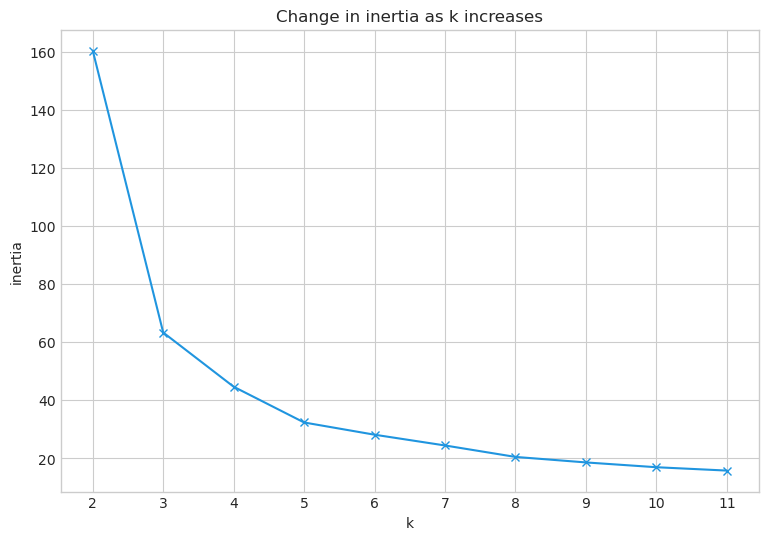

In [33]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

2. 

Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!



In [4]:
def new_mall_data():
    '''
    This function reads the mall data from the Codeup db into a df.
    '''
    # Create SQL query.
    sql_query = 'SELECT * FROM customers'
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_db_url('mall_customers'))
    
    return df

def get_mall_data():
    '''
    This function reads in mall data from Codeup database, writes data to
    a csv file if a local file does not exist, and returns a df.
    '''
    if os.path.isfile('mall.csv'):
        
        # If csv file exists, read in data from csv file.
        df = pd.read_csv('mall.csv', index_col=0)

In [10]:
df = new_mall_data()
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
X = df[['age', 'annual_income']]
X.head()

,age,annual_income
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17


In [12]:
# MAKE the thing
kmeans = KMeans(n_clusters=3)

# FIT the thing
kmeans.fit(X)

# USE (predict using) the thing 
kmeans.predict(X)


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [13]:
# make a new column names cluster in iris and X dataframe

df['cluster'] = kmeans.predict(X)

X['cluster'] = kmeans.predict(X)

df.head(3)

/var/folders/_6/0nkpzhxj2_n85fz5s1rk__xr0000gn/T/ipykernel_16691/1873855551.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = kmeans.predict(X)


,customer_id,gender,age,annual_income,spending_score,cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2


In [ ]:
# Cluster Centers aka centroids. -- The output is also not scaled; 
    # it would be scaled if the data used to fit was scaled.

kmeans.cluster_centers_


In [3]:
def make_blob():
    X, y_true = make_blobs(n_samples=300, centers=4,cluster_std=0.7, random_state=0)
    plt.figure(figsize = (10,6))
    plt.scatter(X[:, 0], X[:, 1], s=30, color = 'gray')
    return plt.show()

def viz_mall(df):
    """
    This function will plot scatter chart for K - Means predictions of mall customers
    """
    
    # Get centroids' coordinates
    centroids = np.array(df.groupby('cluster')['age', 'annual_income'].mean())
    cen_x = [i[0] for i in centroids]
    cen_y = [i[1] for i in centroids]

    # Add centroids' coordinates into new columns in local df
    df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
    df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

    # Creates new column in local df to map distinct cluster colors
    colors = ['#81DF20' ,'#2095DF','#DF2020']
    df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

    #specify custom palette for sns scatterplot
    colors1 = ['#2095DF','#81DF20' ,'#DF2020']
    customPalette = sns.set_palette(sns.color_palette(colors1))

    # Plot the scatterplots

    #Define figure (num of rows, columns and size)
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

    # plot ax1 
    ax1 = plt.subplot(2,1,1) 
    sns.scatterplot(data = df, x = 'age', y = 'annual_income', ax = ax1, hue = 'spending_score', palette=customPalette)
    plt.title('Spending Score')

    #plot ax2
    ax2 = plt.subplot(2,1,2) 
    ax2.scatter(df.age, df.annual_income, c=df.c, alpha = 0.6, s=10)
    ax2.set(xlabel = 'Age', ylabel = 'Income', title = 'K - Means')

    # plot centroids on  ax2
    ax2.scatter(cen_x, cen_y, marker='X', c=colors, s=200)
    
    
    plt.tight_layout()
    plt.show()

/var/folders/_6/0nkpzhxj2_n85fz5s1rk__xr0000gn/T/ipykernel_16691/1861942161.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  centroids = np.array(df.groupby('cluster')['age', 'annual_income'].mean())


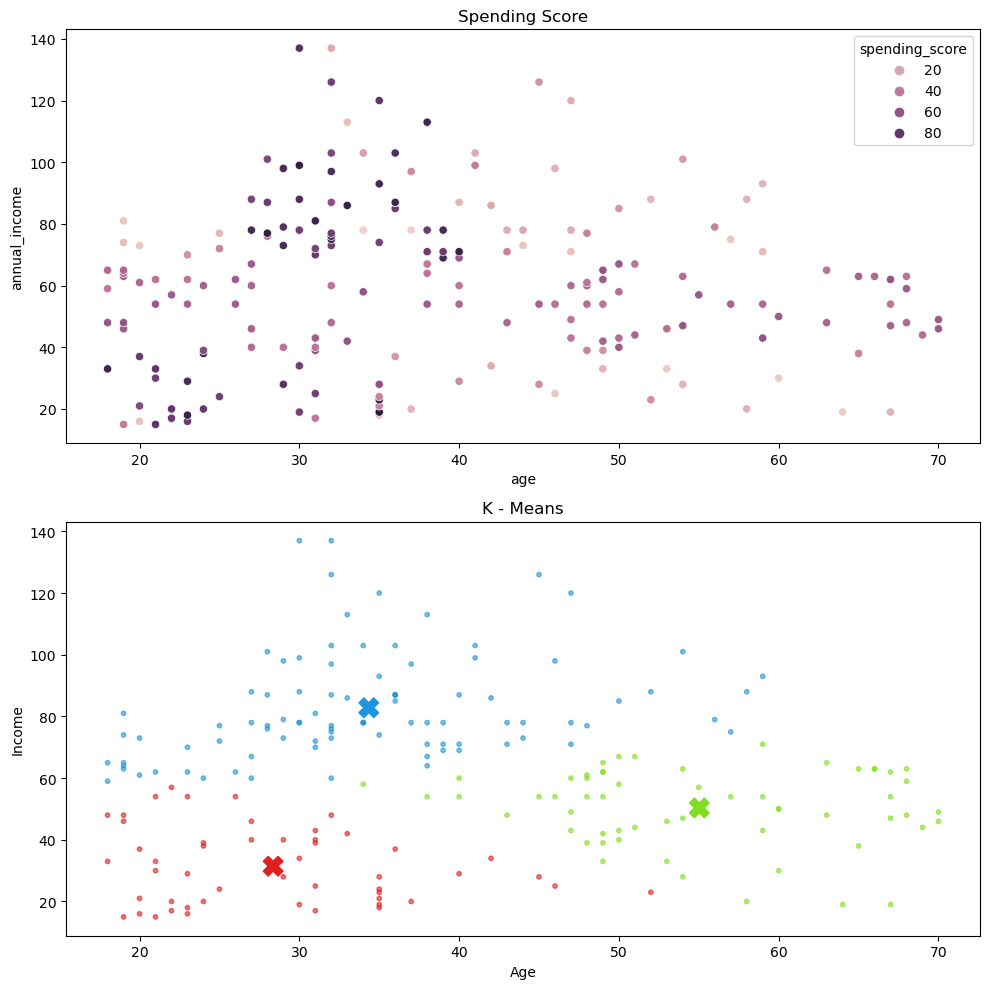

In [21]:
viz_mall(df)

In [22]:
# Cluster Centers aka centroids. -- The output is also not scaled; 
    # it would be scaled if the data used to fit was scaled.

kmeans.cluster_centers_

array([[55.03448276, 50.34482759],
       [34.34782609, 82.82608696],
       [28.36      , 31.44      ]])

In [24]:
# Make a dataframe 

centroids = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns[:2])
centroids


,age,annual_income
0,55.034483,50.344828
1,34.347826,82.826087
2,28.360000,31.440000


In [25]:
#  Find the mean of the original df and groupby cluster

df.groupby('cluster')['age', 'annual_income'].mean()

/var/folders/_6/0nkpzhxj2_n85fz5s1rk__xr0000gn/T/ipykernel_16691/949835471.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('cluster')['age', 'annual_income'].mean()


,age,annual_income
cluster,,
0,55.034483,50.344828
1,34.347826,82.826087
2,28.360000,31.440000


In [26]:
kmeans.labels_


array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [27]:
df['cluster'] = 'cluster_' + df.cluster.astype(str)
df.head()

,customer_id,gender,age,annual_income,spending_score,cluster,cen_x,cen_y,c
0,1,Male,19,15,39,cluster_2,28.36,31.44,#DF2020
1,2,Male,21,15,81,cluster_2,28.36,31.44,#DF2020
2,3,Female,20,16,6,cluster_2,28.36,31.44,#DF2020
3,4,Female,23,16,77,cluster_2,28.36,31.44,#DF2020
4,5,Female,31,17,40,cluster_2,28.36,31.44,#DF2020


In [28]:


kmeans.inertia_



59486.961439280356

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/an

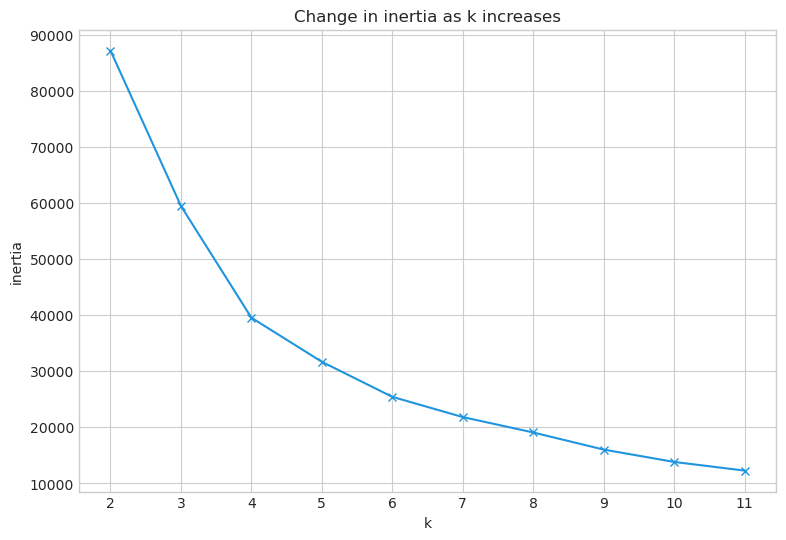

In [29]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

3. 

How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.


In [5]:
df = new_mall_data()
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
X = df[['age', 'annual_income']]
X.head()

,age,annual_income
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17


In [12]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
X_scaled = pd.DataFrame(X_scaled, columns=df.columns, index=df.index)


ValueError: Shape of passed values is (200, 2), indices imply (200, 5)

In [14]:
X_scaled.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'